In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Input Dateset
org_df = pd.read_csv("/Users/zhangxijing/MasterNEU/INFO6105DataScienceEngineeringMethodsandTools/Dataset/hw4_train.csv")
test_df = pd.read_csv("/Users/zhangxijing/MasterNEU/INFO6105DataScienceEngineeringMethodsandTools/Dataset/hw4_test.csv")

#Define features and outcome for Regression
outcome_df =  org_df.loc[:,org_df.columns == 'BloodPressure']
feat_df =  org_df.loc[:,org_df.columns.isin(['Pregnancies','Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])]

#Seperate test and train data
train_x,test_x,train_y,test_y = train_test_split(feat_df,outcome_df,test_size=0.25)

#Create a multiple Reg model
model = LinearRegression()
model.fit(train_x,  train_y)

test_pred_y = model.predict(test_x)

r_sq = model.score(test_x, test_y)
print ('R2 =',r_sq )

# Predict 'BloodPressure' in hw4_test.csv
regression_features = test_df.columns.drop(['BloodPressure'])
X_test_reg = test_df[regression_features]
test_df['BloodPressure'] = model.predict(X_test_reg)
test_pred_y = model.predict(test_x)
print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
print(test_df)

R2 = 0.21190226162267578
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             10      115      75.024034              0        0  35.3   
1              7      100      70.573824              0        0  30.0   
2              0      131      75.978169              0        0  43.2   
3              4       99      63.438885             15       51  23.2   
4              0      162      81.142106             56      100  53.2   
..           ...      ...            ...            ...      ...   ...   
134            4      183      74.843496              0        0  28.4   
135            0      119      69.052128              0        0  32.4   
136            4       90      68.763182              0        0  28.0   
137            0       99      64.348910              0        0  25.0   
138            2      129      78.422295              0        0  38.5   

     DiabetesPedigreeFunction  Age  Outcome  

/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


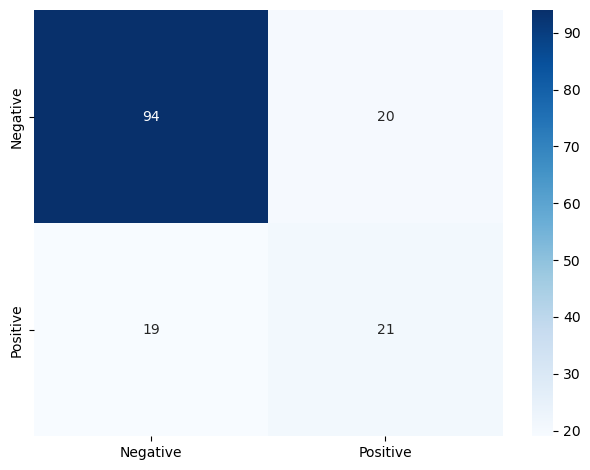

Accuracy= 0.7467532467532467 sensitivity= 0.525 specificity= 0.8245614035087719


In [2]:
#Input Dateset
org_df = pd.read_csv("/Users/zhangxijing/MasterNEU/INFO6105DataScienceEngineeringMethodsandTools/Dataset/hw4_train.csv")

#Define features and label for KNN
label_df =  org_df.loc[:,org_df.columns == 'Outcome']
feat_df =  org_df.loc[:,org_df.columns != 'Outcome']

#Seperate test and train data
train_x,test_x,train_y,test_y = train_test_split(feat_df,label_df,test_size=0.25)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x, train_y)
test_pred_y = knn.predict(test_x)

#Visualize confusion matrix
cf = confusion_matrix(test_y, test_pred_y)
sns.heatmap(cf,annot=True,yticklabels=['Negative','Positive']
               ,xticklabels=['Negative','Positive'],cmap='Blues', fmt='g')
plt.tight_layout()
plt.show()

# accuracy measures
accuracy = (cf[0, 0] + cf[1, 1]) / (cf[0, 0] + cf[0, 1] + cf[1, 0] + cf[1, 1])
sensitivity = cf[1, 1] / (cf[1, 0] + cf[1, 1])
specificity = cf[0, 0] / (cf[0, 0] + cf[0, 1])
print( "Accuracy=", accuracy, 'sensitivity=', sensitivity, 'specificity=', specificity)

Best k based on highest accuracy: 4
Accuracy: 0.8441558441558441, Sensitivity: 0.5909090909090909, Specificity: 0.9454545454545454


/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1

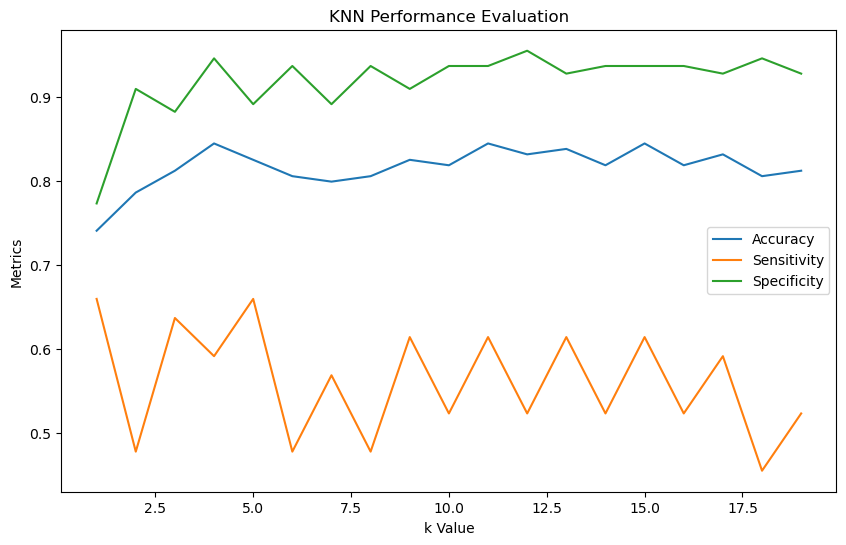

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
org_df = pd.read_csv("/Users/zhangxijing/MasterNEU/INFO6105DataScienceEngineeringMethodsandTools/Dataset/hw4_train.csv")

# Define features and label
# label_df = org_df['Outcome']
# feat_df = org_df.drop('Outcome', axis=1)

label_df =  org_df.loc[:,org_df.columns == 'Outcome']
feat_df =  org_df.loc[:,org_df.columns != 'Outcome']

# regression_features = test_df.columns.drop(['BloodPressure'])

# Separate test and train data
train_x, test_x, train_y, test_y = train_test_split(feat_df, label_df, test_size=0.25, random_state=42)

# Initialize lists to store the metrics
accuracies = []
sensitivities = []
specificities = []
k_values = range(1, 20)

# Train 19 KNN models with k from 1 to 19
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_y)
    test_pred_y = knn.predict(test_x)

    # Calculate confusion matrix and extract TP, TN, FP, FN
    cf = confusion_matrix(test_y, test_pred_y)
    TN, FP, FN, TP = cf.ravel()

    # Calculate accuracy, sensitivity (recall), and specificity
    accuracy = accuracy_score(test_y, test_pred_y)
    sensitivity = recall_score(test_y, test_pred_y)
    specificity = TN / (TN + FP)

    # Append metrics to their respective lists
    accuracies.append(accuracy)
    sensitivities.append(sensitivity)
    specificities.append(specificity)

# Identify the best k based on highest accuracy (or other criteria)
best_k_acc = k_values[accuracies.index(max(accuracies))]
print(f"Best k based on highest accuracy: {best_k_acc}")
print(f"Accuracy: {max(accuracies)}, Sensitivity: {sensitivities[accuracies.index(max(accuracies))]}, Specificity: {specificities[accuracies.index(max(accuracies))]}")

# Optionally, plot the metrics to visualize performance trends
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, label='Accuracy')
plt.plot(k_values, sensitivities, label='Sensitivity')
plt.plot(k_values, specificities, label='Specificity')
plt.xlabel('k Value')
plt.ylabel('Metrics')
plt.title('KNN Performance Evaluation')
plt.legend()
plt.show()

In [ ]:
# Report the best K and explain your reasons for this selection.
# k=4 model provided a strong balance between sensitivity and specificity, implying it effectively identifies positive cases without significantly increasing the false positive rate.

In [ ]:
#Input Dateset
org_df = pd.read_csv("/Users/zhangxijing/MasterNEU/INFO6105DataScienceEngineeringMethodsandTools/Dataset/hw4_train.csv")
test_df = pd.read_csv("/Users/zhangxijing/MasterNEU/INFO6105DataScienceEngineeringMethodsandTools/Dataset/hw4_test.csv")

#Define features and outcome for Regression
outcome_df =  org_df.loc[:,org_df.columns == 'BloodPressure']
feat_df =  org_df.loc[:,org_df.columns.isin(['Pregnancies','Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])]

#Seperate test and train data
train_x,test_x,train_y,test_y = train_test_split(feat_df,outcome_df,test_size=0.25)

#Create a multiple Reg model
model = LinearRegression()
model.fit(train_x,  train_y)

test_pred_y = model.predict(test_x)

r_sq = model.score(test_x, test_y)
print ('R2 =',r_sq ) # statistical measure of how well the regression predictions approximate the real data points

# Predict 'BloodPressure' in hw4_test.csv
regression_features = test_df.columns.drop(['BloodPressure'])
X_test_reg = test_df[regression_features]
test_df['BloodPressure'] = model.predict(X_test_reg)
test_pred_y = model.predict(test_x)
print(test_df)